In [42]:
import os
import os.path
import pandas as pd
import mysql.connector
import sqlalchemy
from sqlalchemy import create_engine
import datetime
import pickle
import logging
from slugify import slugify
import requests
import glob

BASE_DIR = os.path.expanduser('~')+"/Heatseek/"

try:
    os.stat(BASE_DIR)
except:
    os.mkdir(BASE_DIR)

LOG_FILE = BASE_DIR+'db_import.log'

logging.basicConfig(format= '[%(asctime)s] {%(pathname)s:%(lineno)d} %(levelname)s - %(message)s',
    datefmt='%H:%M:%S',
    filename=LOG_FILE, 
    level=logging.INFO)

log = logging.getLogger(__name__)
print "This notebook will log to {}".format(LOG_FILE)
log.info("This notebook will log to {}".format(LOG_FILE))

This notebook will log to /Users/jfreeley/Heatseek/db_import.log


In [43]:
import os
import mysql.connector
from sqlalchemy import create_engine

user = os.environ['MYSQL_USER']
host = os.environ['MYSQL_HOST']
pw = os.environ['MYSQL_PASSWORD']
db = os.environ['MYSQL_DATABASE_DATA']

user = 'root'
host = 'localhost'
pw = ''
db = 'heatseek'

conn_str = "mysql+mysqlconnector://{0}:{1}@{2}/{3}".format(user, pw, host, db)
engine = create_engine(conn_str, echo=False)

In [44]:
df = pd.read_sql('select * from bad_buildings', con=engine )
df.shape

(292376, 75)

In [46]:
cols_to_keep = [
    'hbaddress', 
    'all_hpd_complaints',
    'hs_hpd_complaints',
    'heat_311_hpd_count',
    'all_311_hpd_count',
    'dob_violation_cnt',
    'permit_cnt',
    'hs_permit_cnt',
    'all_hpd_complaints_per_resunits',
    'hs_hpd_complaints_per_resunits',
    'heat_311_hpd_count_per_resunits',
    'all_311_hpd_count_per_resunits',
    'dob_violation_cnt_per_resunits',
    'hs_permit_cnt_per_resunits',
    'rentstab2007_per_resunits',
    'rentstab2015_per_resunits',
    'diff_per_resunits',
    'classA_cnt_per_resunits',
    'classB_cnt_per_resunits',
    'classC_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsres',
    'unitstotal',
    'unitsstab2007',
    'unitsstab2015',
    'diff',
    'percentchange',
    'classA_cnt',
    'classB_cnt',
    'classC_cnt',
    'classI_cnt',
    'litigation_cnt',
    'zip', #
    'owner_name', #
    'managementprogram', #
    'target',
    'bb_target',
    'bb_score'
]

#SMOTE
#
df_features = df[cols_to_keep]
df_features.fillna(0, inplace=True)

df_features

,hbaddress,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,dob_violation_cnt,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,...,classB_cnt,classC_cnt,classI_cnt,litigation_cnt,zip,owner_name,managementprogram,target,bb_target,bb_score
0,403 EAST 6 STREET MANHATTAN,6.000,4.000,0.000,2.000,0,1.000,0.000,0.857,0.571,...,15,6,0.000,0.000,10016,JOSH SHINE,PVT,0.000,1.000,3.429
1,1005 1 AVENUE MANHATTAN,0.000,0.000,0.000,0.000,15,0.000,0.000,0.000,0.000,...,0,0,0.000,0.000,10022,0,PVT,0.000,0.000,0.000
2,1006 1 AVENUE MANHATTAN,2.000,2.000,2.000,2.000,4,68.000,31.000,0.003,0.003,...,2,0,1.000,0.000,10022,EMANUEL EDWARDS,PVT,0.000,0.000,0.016
3,101 1 AVENUE MANHATTAN,1.000,0.000,0.000,1.000,2,0.000,0.000,0.250,0.000,...,34,1,3.000,0.000,10003,LISA/STEPHAN KOBYLECKYJ,PVT,0.000,1.000,9.875
4,102 1 AVENUE MANHATTAN,0.000,0.000,0.000,0.000,2,0.000,0.000,0.000,0.000,...,0,0,1.000,0.000,10009,ANDREW FARBER,PVT,0.000,0.000,1.000
5,1026 1 AVENUE MANHATTAN,36.000,23.000,23.000,30.000,8,162.000,76.000,0.139,0.089,...,17,0,0.000,0.000,10022,EYAL REGGEV,PVT,0.000,0.000,0.127
6,103 1 AVENUE MANHATTAN,0.000,0.000,0.000,1.000,2,1.000,0.000,0.000,0.000,...,0,0,0.000,0.000,10003,0,PVT,0.000,0.000,1.000
7,105 1 AVENUE MANHATTAN,0.000,0.000,0.000,0.000,1,2.000,1.000,0.000,0.000,...,0,0,0.000,0.000,10003,LEONARD EIS,PVT,0.000,0.000,0.667
8,1057 1 AVENUE MANHATTAN,13.000,13.000,13.000,13.000,0,4.000,2.000,0.812,0.812,...,0,1,0.000,0.000,10022,JANET GIAIMO VITALE,PVT,0.000,0.000,0.094
9,1058 1 AVENUE MANHATTAN,32.000,6.000,0.000,43.000,4,92.000,51.000,0.256,0.048,...,4,2,0.000,0.000,10022,EYAL REGGEV,PVT,0.000,0.000,0.120


In [49]:
print df_features[df_features['bb_score'] > 0].shape
print df_features[df_features['bb_score'] <= 0].shape

(138325, 40)
(154051, 40)


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_features['enc-managementprogram'] = le.fit_transform(df_features['managementprogram'])
df_features['enc-owner_name'] = le.fit_transform(df_features['owner_name'])
df_features['enc-hbaddress'] = le.fit_transform(df_features['hbaddress'])
df_features['enc-zip'] = le.fit_transform(df_features['zip'])


/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [51]:
import math
df_features['log_bb_score'] = df_features[df_features['bb_score']> 0]['bb_score'].apply(lambda x: math.log(x))
#df_features[df_features['bb_score']> 0]['bb_score'].hist(bins=200)

/Applications/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


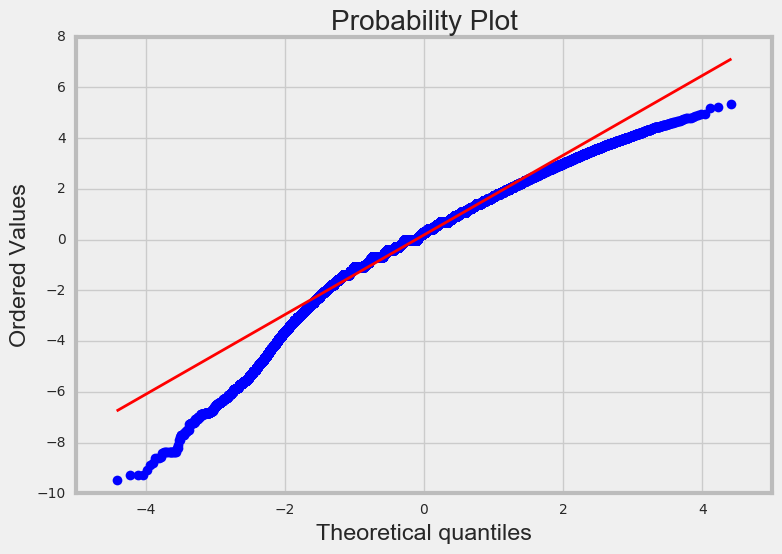

In [52]:
import numpy as np
import pylab
import scipy.stats as stats

#QQ PLOT
stats.probplot(df_features[df_features['bb_score']> 0]['bb_score'].apply(lambda x: math.log(x)), dist="norm", plot=pylab)
pylab.show()
#SOME SKEWNESS WITH THE LOG BUT STILL QUITE USABLE

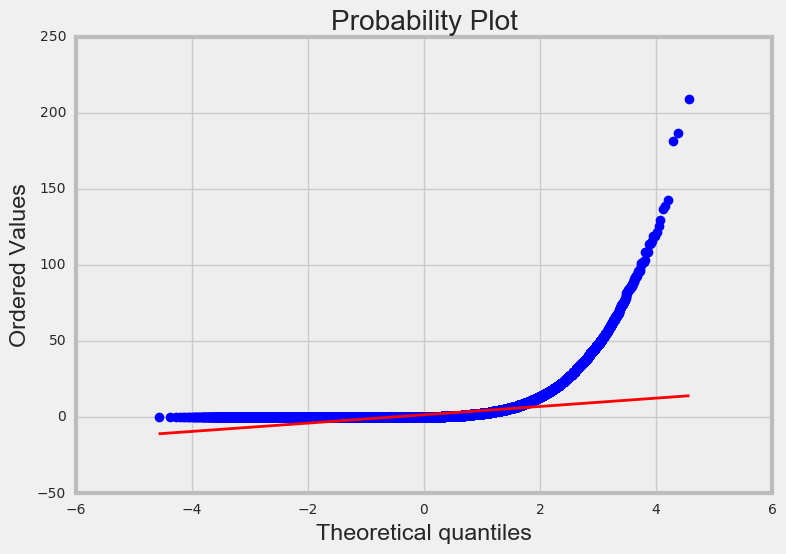

In [53]:
import numpy as np
import pylab
import scipy.stats as stats

# QQ PLOT
stats.probplot(df_features['bb_score'], dist="norm", plot=pylab)
pylab.show()

# VERY SKEWED ... CONSIDER LOG TRANSFORM
# REASON FOR USING BINARY CLASSIFICATION

In [55]:
df_features = df_features.dropna()
print df_features.shape

cols_to_keep = [
    'all_hpd_complaints',
    'hs_hpd_complaints',
    'heat_311_hpd_count',
    'all_311_hpd_count',
    'permit_cnt',
    'hs_permit_cnt',
    'all_hpd_complaints_per_resunits',
    'hs_hpd_complaints_per_resunits',
    'heat_311_hpd_count_per_resunits',
    'all_311_hpd_count_per_resunits',
    'hs_permit_cnt_per_resunits',
    'rentstab2007_per_resunits',
    'rentstab2015_per_resunits',
    'diff_per_resunits',
    'classA_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsstab2007',
    'unitsstab2015',
    'diff',
    'percentchange',
    'classA_cnt',
    'classI_cnt',
    'litigation_cnt',
    'enc-zip',
    'enc-hbaddress',
    'enc-owner_name',
    'enc-managementprogram'
]
X = df_features[cols_to_keep]
y = df_features['bb_target']

X.shape

(138325, 45)


(138325, 29)

In [56]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
X.describe()

,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,heat_311_hpd_count_per_resunits,all_311_hpd_count_per_resunits,...,unitsstab2015,diff,percentchange,classA_cnt,classI_cnt,litigation_cnt,enc-zip,enc-hbaddress,enc-owner_name,enc-managementprogram
count,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,...,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000
mean,9.653,4.114,3.063,10.039,1.533,0.638,0.984,0.369,0.257,1.041,...,9.496,0.298,-2.763,2.613,0.323,0.425,109.556,146949.653,10385.897,11.958
std,40.503,22.439,23.450,46.109,5.523,2.471,3.896,1.569,1.327,4.128,...,136.829,45.019,20.686,5.862,0.748,1.340,52.198,83419.494,14435.799,0.475
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,-455.000,-100.000,0.000,0.000,0.000,0.000,7.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,75.000,75158.000,0.000,12.000
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,118.000,148840.000,0.000,12.000
75%,4.000,2.000,1.000,4.000,1.000,0.000,0.500,0.167,0.048,0.500,...,0.000,0.000,0.000,3.000,0.000,0.000,141.000,217823.000,20856.000,12.000
max,3643.000,3544.000,4381.000,5182.000,310.000,129.000,228.500,183.000,183.833,238.000,...,8655.000,2766.000,100.000,214.000,25.000,41.000,215.000,292016.000,46314.000,12.000


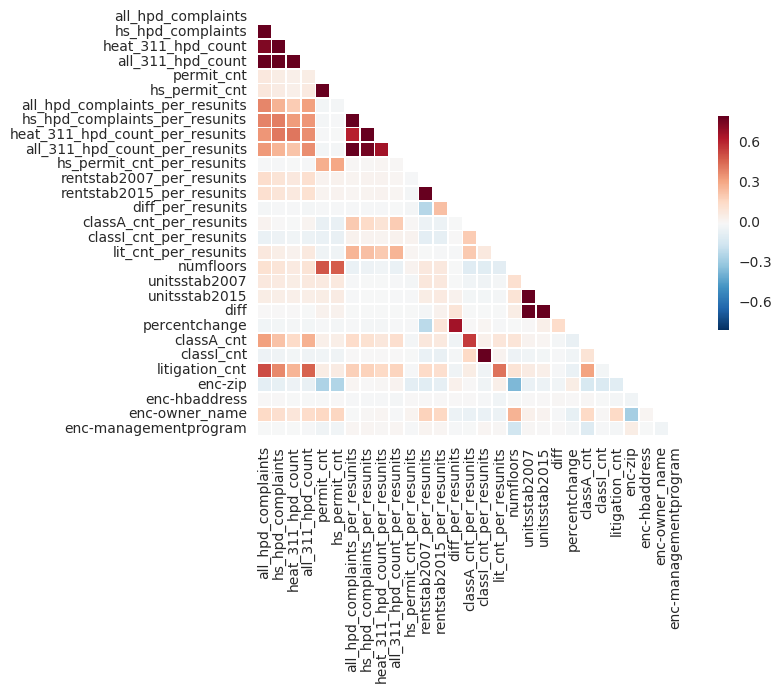

In [57]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.style.use('ggplot')
# af_corr = X.coor()
# sns.set(style='white')
# mask  = np.zeros_like(af_corr, dtype=np.bool)
# mask(np.triu_indices_from(mask) = True)
# sns.heatmap(af_corr, mask=mask, vmax=3,sqaure=True, linewidths=.5 , char_kws={"shrink":.5})

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
%matplotlib inline

af_corr = X.corr()

sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(af_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(af_corr, mask=mask, vmax=.8,
           square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [58]:
X.corr()

,all_hpd_complaints,hs_hpd_complaints,heat_311_hpd_count,all_311_hpd_count,permit_cnt,hs_permit_cnt,all_hpd_complaints_per_resunits,hs_hpd_complaints_per_resunits,heat_311_hpd_count_per_resunits,all_311_hpd_count_per_resunits,...,unitsstab2015,diff,percentchange,classA_cnt,classI_cnt,litigation_cnt,enc-zip,enc-hbaddress,enc-owner_name,enc-managementprogram
all_hpd_complaints,1.000,0.880,0.745,0.906,0.081,0.090,0.389,0.394,0.352,0.348,...,0.057,0.000,-0.027,0.329,-0.038,0.521,-0.080,0.000,0.160,-0.005
hs_hpd_complaints,0.880,1.000,0.940,0.869,0.062,0.068,0.281,0.411,0.421,0.270,...,0.054,0.005,-0.019,0.232,-0.032,0.384,-0.065,0.001,0.133,-0.004
heat_311_hpd_count,0.745,0.940,1.000,0.831,0.045,0.050,0.201,0.338,0.426,0.229,...,0.044,0.005,-0.013,0.155,-0.024,0.270,-0.041,-0.001,0.098,-0.003
all_311_hpd_count,0.906,0.869,0.831,1.000,0.062,0.070,0.325,0.353,0.373,0.369,...,0.056,-0.001,-0.023,0.283,-0.036,0.472,-0.059,-0.006,0.145,-0.007
permit_cnt,0.081,0.062,0.045,0.062,1.000,0.944,-0.021,-0.016,-0.009,-0.023,...,0.061,0.037,-0.008,0.045,-0.027,0.061,-0.247,-0.000,0.167,-0.034
hs_permit_cnt,0.090,0.068,0.050,0.070,0.944,1.000,-0.015,-0.011,-0.005,-0.017,...,0.067,0.037,-0.016,0.051,-0.033,0.068,-0.239,0.003,0.171,-0.027
all_hpd_complaints_per_resunits,0.389,0.281,0.201,0.325,-0.021,-0.015,1.000,0.827,0.620,0.898,...,-0.007,-0.005,-0.012,0.147,0.004,0.188,0.016,-0.008,-0.004,0.016
hs_hpd_complaints_per_resunits,0.394,0.411,0.338,0.353,-0.016,-0.011,0.827,1.000,0.871,0.772,...,-0.005,-0.005,-0.015,0.123,0.003,0.182,0.005,-0.009,0.009,0.016
heat_311_hpd_count_per_resunits,0.352,0.421,0.426,0.373,-0.009,-0.005,0.620,0.871,1.000,0.671,...,-0.003,-0.004,-0.013,0.094,0.000,0.157,0.007,-0.011,0.013,0.011
all_311_hpd_count_per_resunits,0.348,0.270,0.229,0.369,-0.023,-0.017,0.898,0.772,0.671,1.000,...,-0.007,-0.005,-0.010,0.135,0.003,0.181,0.026,-0.013,-0.009,0.014


In [59]:
from sklearn.preprocessing import StandardScaler

X_norm =  StandardScaler().fit_transform(X);

df_stand = pd.DataFrame(X_norm, columns=X.columns)
df_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138325 entries, 0 to 138324
Data columns (total 29 columns):
all_hpd_complaints                 138325 non-null float64
hs_hpd_complaints                  138325 non-null float64
heat_311_hpd_count                 138325 non-null float64
all_311_hpd_count                  138325 non-null float64
permit_cnt                         138325 non-null float64
hs_permit_cnt                      138325 non-null float64
all_hpd_complaints_per_resunits    138325 non-null float64
hs_hpd_complaints_per_resunits     138325 non-null float64
heat_311_hpd_count_per_resunits    138325 non-null float64
all_311_hpd_count_per_resunits     138325 non-null float64
hs_permit_cnt_per_resunits         138325 non-null float64
rentstab2007_per_resunits          138325 non-null float64
rentstab2015_per_resunits          138325 non-null float64
diff_per_resunits                  138325 non-null float64
classA_cnt_per_resunits            138325 non-null float64
clas

In [60]:
X_features = df_stand
y_features = y

#y_features = y_features.map(lambda x: 'no' if x ==0 else 'yes')

len(y_features)

138325

Random Forest Score:	0.773 ± 0.002
Ada Boost Score:	0.794 ± 0.001
Gradient Boosting Score:	0.8 ± 0.003
Decision Tree Score:	0.727 ± 0.002


,Gradient Boosting,Ada Boost,Random Forest,Decision Tree
classA_cnt_per_resunits,0.246,0.160,0.164,0.262
enc-zip,0.124,0.080,0.114,0.099
numfloors,0.083,0.140,0.070,0.056
classI_cnt_per_resunits,0.070,0.020,0.019,0.017
hs_permit_cnt_per_resunits,0.069,0.060,0.012,0.011
lit_cnt_per_resunits,0.062,0.060,0.023,0.021
classA_cnt,0.052,0.060,0.053,0.018
all_311_hpd_count_per_resunits,0.045,0.060,0.031,0.032
unitsstab2007,0.032,0.060,0.013,0.004
all_hpd_complaints_per_resunits,0.032,0.060,0.029,0.018


None


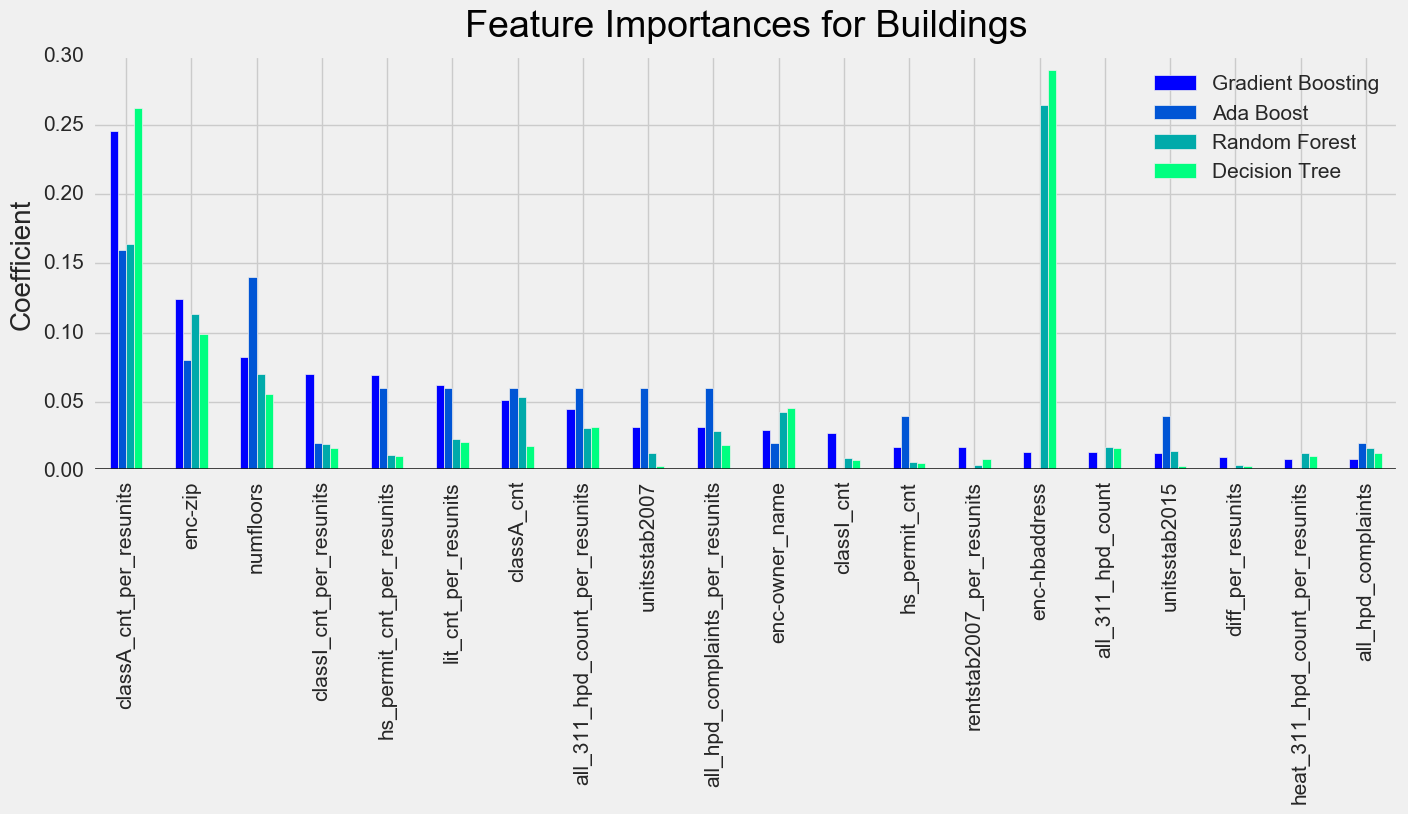

In [61]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from IPython.display import display, HTML

plt.style.use('bmh')
plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-deep')


rf = RandomForestClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
dtc = DecisionTreeClassifier()

cv = StratifiedKFold(y_features, n_folds=5, shuffle=True, random_state=78)
def score(model, name):
    s = cross_val_score(model, X_features, y_features, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))

score(rf,"Random Forest")
score(abc, "Ada Boost")
score(gbc, "Gradient Boosting")
score(dtc, "Decision Tree")

rf.fit(X_features, y_features)
abc.fit(X_features, y_features)
gbc.fit(X_features, y_features)
dtc.fit(X_features, y_features)

importances = pd.DataFrame(zip(gbc.feature_importances_,
                               abc.feature_importances_,
                               rf.feature_importances_,
                               dtc.feature_importances_,
                              ),
                           index=X_features.columns,
                           columns=['Gradient Boosting',
                                    'Ada Boost',
                                    'Random Forest',
                                    'Decision Tree',
                                   ]).sort_values('Gradient Boosting',
                                                                  ascending=False)

print display(importances.head(30))

importances[0:20].plot(kind='bar', figsize=(15,5), colormap='winter')


plt.title('Feature Importances for Buildings', fontsize = 27, y = 1.03, color='black')


plt.ylabel('Coefficient', fontsize = 20)
plt.yticks(fontsize = 15)

#plt.xlabel('Features', fontsize = 30)
plt.axhline(0, color='black')
plt.xticks(rotation=90, fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [62]:
cols_to_keep = [
    'hs_permit_cnt',
    'all_311_hpd_count_per_resunits',
    'hs_permit_cnt_per_resunits',
    'classA_cnt_per_resunits',
    'classI_cnt_per_resunits',
    'lit_cnt_per_resunits',
    'numfloors',
    'unitsstab2007',
    'classA_cnt',
]

X_features = X_features[cols_to_keep]

In [63]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

cv = StratifiedKFold(y_features, n_folds=10, shuffle=True, random_state=41)

lg= LogisticRegression()
dt = DecisionTreeClassifier(class_weight='balanced',min_samples_split=50)
bdt = BaggingClassifier(DecisionTreeClassifier())
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1)
et = ExtraTreesClassifier(class_weight='balanced', n_jobs=-1)
abc = AdaBoostClassifier()
gbst = GradientBoostingClassifier()
bnb = BernoulliNB()
svc = SVC(kernel='linear',probability=True)


def score(model, name):
    s = cross_val_score(model, X_features, y_features, cv=cv, n_jobs=-1)
    print "{} Score:\t{:0.3} ± {:0.3}".format(name, s.mean().round(3), s.std().round(3))
        
score(dt,"Decision Tree")
score(lg, "Logistic Regression")
score(bdt, "Bagging Decision Tree")
score(rf, "Random Forest")
score(et, "Extra Trees")
score(abc, "Ada Boost")
score(gbst, "Gradient Boosting")
score(bnb, "Bernoulli NB")
# score(svc, "SVC") # Significantly LONG run-time therefore, not recommended. 


Decision Tree Score:	0.743 ± 0.004
Logistic Regression Score:	0.792 ± 0.002
Bagging Decision Tree Score:	0.778 ± 0.003
Random Forest Score:	0.758 ± 0.004
Extra Trees Score:	0.751 ± 0.004
Ada Boost Score:	0.794 ± 0.003
Gradient Boosting Score:	0.801 ± 0.003
Bernoulli NB Score:	0.782 ± 0.003


In [64]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.33, random_state=16)


### Log Reg

In [65]:
from sklearn.grid_search import GridSearchCV

C_vals = [0.0001, 0.001, 0.01, 0.1, .15, .25, .275, .33, 0.5, .66, 0.75, 1.0, 2.5, 5.0, 10.0, 100.0, 1000.0]
penalties = ['l1','l2']

lgm = GridSearchCV(lg, {'penalty': penalties, 'C': C_vals}, verbose=False, cv=10)
lgm_model=lgm.fit(X_train, y_train)

In [66]:
print lgm_model.best_score_
print lgm_model.best_params_
print lgm_model.best_estimator_

0.792591473613
{'penalty': 'l2', 'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


### Best Logistic Regression Model Parameters
`0.792591473613
{'penalty': 'l2', 'C': 0.01}
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)`

In [67]:
y_lgm = lgm_model.predict_proba(X_test)[:,1]

In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_lgm1 = lgm_model.predict(X_test)

print accuracy_score(y_test, y_lgm1)

print classification_report(y_test, y_lgm1)
print confusion_matrix(y_test,y_lgm1)

0.791513319313
             precision    recall  f1-score   support

        0.0       0.80      0.94      0.86     32044
        1.0       0.76      0.44      0.56     13604

avg / total       0.79      0.79      0.77     45648

[[30162  1882]
 [ 7635  5969]]


(array([ 0.5,  1.5]), <a list of 2 Text yticklabel objects>)

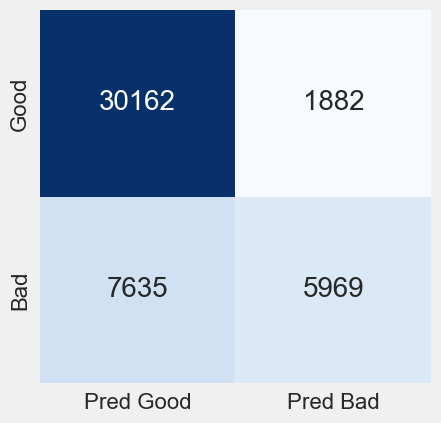

In [78]:
mat = np.array(confusion_matrix(y_test,y_lgm1))

confusion = pd.DataFrame(mat, index=['Good','Bad'],\
                     columns=['Pred Good','Pred Bad'])

plt.figure(figsize = (4.5,4.5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Confusion Matrix", fontsize=20)

### gbst

In [79]:
from sklearn.grid_search import GridSearchCV


params = {"max_depth": [3,5,10],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10,20],
          "min_samples_split": [2, 5, 7,10,20]
         } 

params = {"max_depth": [3],
          "max_features": [None],
          "min_samples_leaf": [1],
          "min_samples_split": [2]
         } 

gbst = GridSearchCV(gbst, params, n_jobs=-1, cv=10)

gbst.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None], 'min_samples_split': [2], 'max_depth': [3], 'min_samples_leaf': [1]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [80]:
print gbst.best_score_
print gbst.best_params_
print gbst.best_estimator_


0.800284860321
{'max_features': None, 'min_samples_split': 2, 'max_depth': 3, 'min_samples_leaf': 1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)


### Best Gradient Boosting Model Parameters
`0.800284860321
{'max_features': None, 'min_samples_split': 2, 'max_depth': 3, 'min_samples_leaf': 1}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)`

In [81]:
y_gbst = gbst.predict_proba(X_test)[:,1]

In [82]:
y_gbst1 = gbst.predict(X_test)
print accuracy_score(y_test, y_gbst1)
print classification_report(y_test, y_gbst1)
print confusion_matrix(y_test, y_gbst1)

0.798633017876
             precision    recall  f1-score   support

        0.0       0.82      0.92      0.87     32044
        1.0       0.73      0.51      0.60     13604

avg / total       0.79      0.80      0.79     45648

[[29474  2570]
 [ 6622  6982]]


(array([ 0.5,  1.5]), <a list of 2 Text yticklabel objects>)

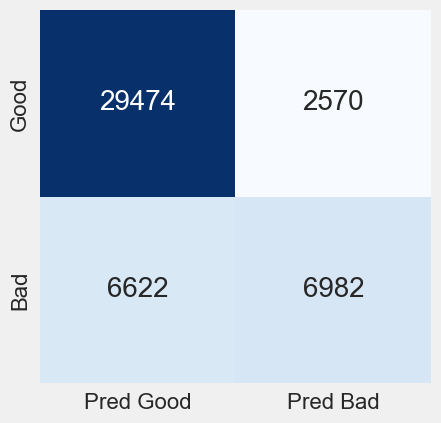

In [92]:
mat = np.array(confusion_matrix(y_test,y_gbst1))

confusion = pd.DataFrame(mat, index=['Good','Bad'],\
                     columns=['Pred Good','Pred Bad'])

plt.figure(figsize = (4.5,4.5))
heat = sns.heatmap(confusion, annot=True, annot_kws={"size": 20},cmap='Blues',fmt='g', cbar=False)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
# plt.title("Confusion Matrix", fontsize=20)

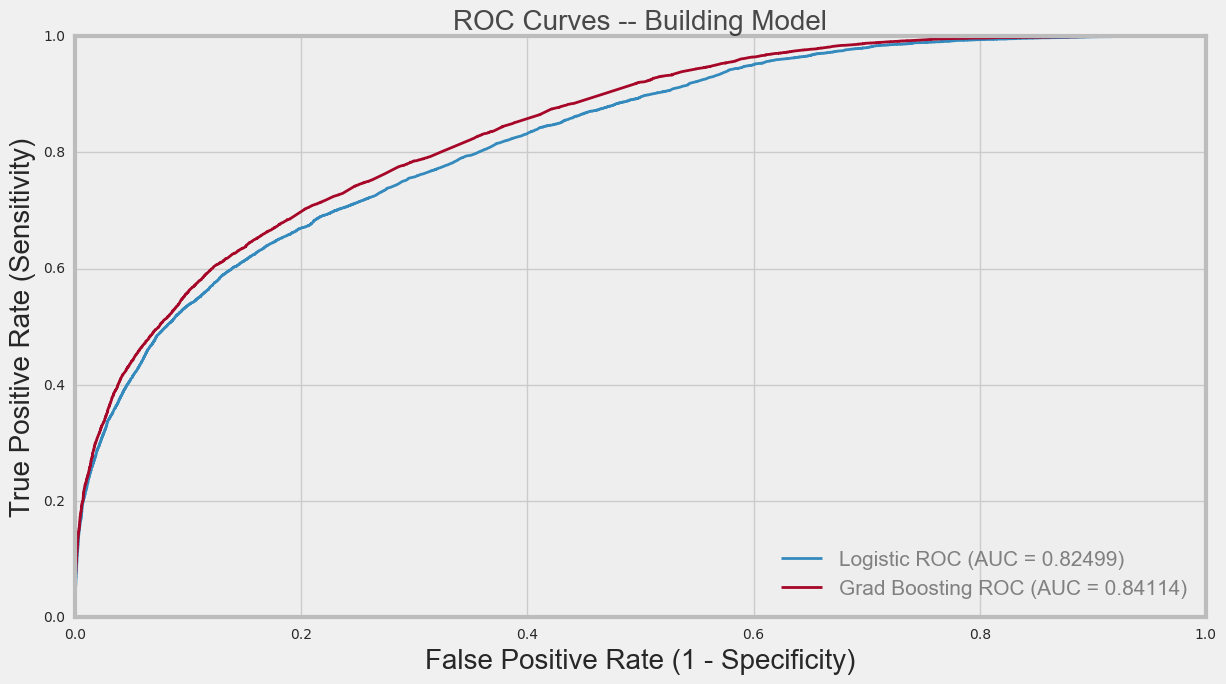

In [84]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

plt.style.use(['fivethirtyeight','bmh'])
plt.figure(figsize=(13,7))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_lgm)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_gbst)

ROC_AUC = auc(fpr, tpr)
ROC_AUC2 = auc(fpr2, tpr2)

plt.plot(fpr, tpr, label='Logistic ROC (AUC = %0.5f)' % ROC_AUC)
plt.plot(fpr2, tpr2, label='Grad Boosting ROC (AUC = %0.5f)' % ROC_AUC2)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=20)
plt.ylabel('True Positive Rate (Sensitivity)',fontsize=20)
l=plt.legend(loc='lower right', fontsize=15)
for text in l.get_texts():
    text.set_color("gray")

plt.title('ROC Curves -- Building Model', color="black", alpha=0.7,fontsize=20)
plt.show()

### PCA BELOW

In [85]:
x2 = X_features.values
y2 = y_features.values

import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn import metrics

xStand = StandardScaler().fit_transform(x2)
scaled = pd.DataFrame(xStand, columns=X_features.columns, index=None)
X = scaled

#scaled.hist(figsize=(20,10))
covMat1 = np.cov(X_features.T)
eigenValues, eigenVectors = np.linalg.eig(covMat1)
#print "Eigen vlues: ", eigenValues

eigenPairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eigenPairs.sort()
eigenPairs.reverse()
#print "EigenPairs:" ,eigenPairs

weight_2d_projection = np.hstack((eigenPairs[0][1].reshape(eigenVectors.shape[1],1),
                                  eigenPairs[1][1].reshape(eigenVectors.shape[1],1),
                                  eigenPairs[2][1].reshape(eigenVectors.shape[1],1)))

num_components = 10
pca = PCA(n_components = num_components)
pca.fit(X_features)
pca_df = pd.DataFrame(pca.fit_transform(X))

pca_vec = pca.components_

cumulvarExpl = pca.explained_variance_ratio_.cumsum()


In [86]:
X_features.describe()

,hs_permit_cnt,all_311_hpd_count_per_resunits,hs_permit_cnt_per_resunits,classA_cnt_per_resunits,classI_cnt_per_resunits,lit_cnt_per_resunits,numfloors,unitsstab2007,classA_cnt,enc-zip
count,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000,138325.000
mean,-0.000,0.000,-0.000,0.000,0.000,-0.000,-0.000,-0.000,-0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.258,-0.252,-0.224,-0.395,-0.345,-0.289,-1.140,-0.096,-0.446,-2.099
25%,-0.258,-0.252,-0.224,-0.395,-0.345,-0.289,-0.533,-0.096,-0.446,-0.662
50%,-0.258,-0.252,-0.224,-0.395,-0.345,-0.289,-0.229,-0.096,-0.446,0.162
75%,-0.258,-0.131,-0.224,0.027,-0.345,-0.289,0.074,-0.065,0.066,0.602
max,51.941,57.404,77.154,33.313,38.675,39.739,26.183,61.351,36.060,2.020


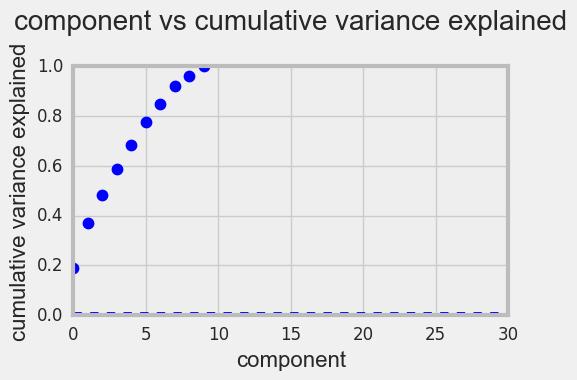

In [87]:
plt.figure(figsize=(5,3))

component_number = range(num_components)

plt.scatter(component_number, cumulvarExpl, lw=4, color='blue')

plt.axhline(y=0, linewidth=5, color='blue', ls='dashed')
plt.axhline(y=100, linewidth=3, color='blue', ls='dashed')


ax = plt.gca()
ax.set_xlim([0,30])
ax.set_ylim([0,1])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

In [88]:
Z = X.dot(weight_2d_projection)

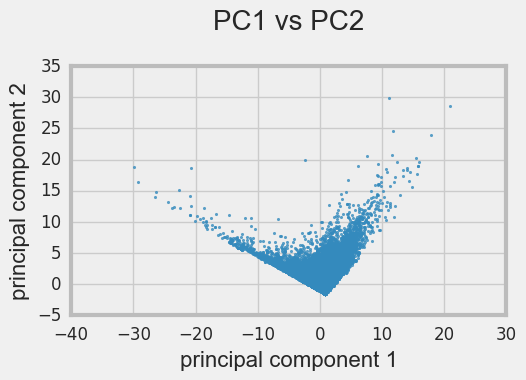

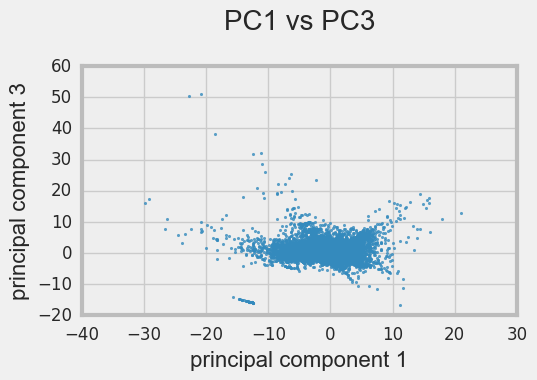

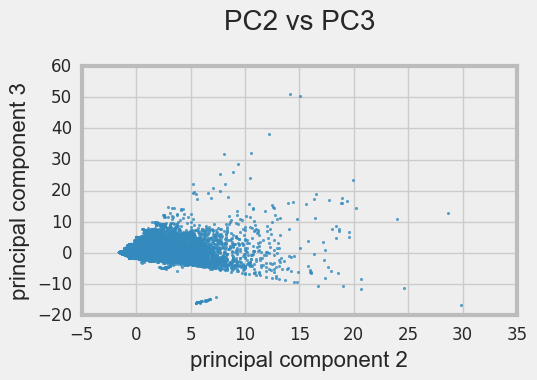

In [89]:
fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()

fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,2],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 3', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC3\n', fontsize=20)

plt.show()

fig = plt.figure(figsize=(5,3))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,1], Z.iloc[:,2],
                 fit_reg=False, scatter_kws={'s':5}, ax=ax)

ax.set_xlabel('principal component 2', fontsize=16)
ax.set_ylabel('principal component 3', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC2 vs PC3\n', fontsize=20)

plt.show()

In [91]:
pc_scaled = scaled.copy()
pc_scaled['PC1'] = Z.iloc[:,0]
pc_scaled['PC2'] = Z.iloc[:,1]
pc_scaled['PC3'] = Z.iloc[:,2]

pc_scaled = pd.melt(pc_scaled, id_vars=['PC1','PC2', 'PC3'])
pc_scaled.shape

(1383250, 5)